# Pymaceuticals Inc.
---

### Analysis

The drug regime of Capomulin and Ramicane were the drugs that had a better outcome in reducing the tumors during the trail periods (Timepoints). Each mouse test regime was withing the std. criteria. Zoniferol yeilded the least sucessful results and showed no significaint decline in the size of the tumors. 

In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as st
import numpy as np 
import sys
import seaborn as sns

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
df = pd.DataFrame(mouse_data_complete)
df_index = pd.Index(['Mouse ID'], name='mouse')
# Display the data table for preview
df.head(), df['Mouse ID'].value_counts()

(  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
 0     k403     Ramicane  Male          21          16          0   
 1     k403     Ramicane  Male          21          16          5   
 2     k403     Ramicane  Male          21          16         10   
 3     k403     Ramicane  Male          21          16         15   
 4     k403     Ramicane  Male          21          16         20   
 
    Tumor Volume (mm3)  Metastatic Sites  
 0           45.000000                 0  
 1           38.825898                 0  
 2           35.014271                 1  
 3           34.223992                 1  
 4           32.997729                 1  ,
 g989    13
 k403    10
 j365    10
 j984    10
 k210    10
         ..
 v199     1
 t573     1
 f932     1
 b447     1
 u153     1
 Name: Mouse ID, Length: 249, dtype: int64)

In [4]:
# Checking the number of mice.
df_u = mouse_data_complete["Mouse ID"].nunique()
df_u


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint : Drop Duplicates 
# df = pd.DataFrame(mouse_data_complete)  keep = 'last').reset_index(drop = True)
# Reference: https://www.geeksforgeeks.org/delete-duplicates-in-a-pandas-dataframe-based-on-two-columns/
mouse_drop_duplicates = mouse_data_complete.drop_duplicates(subset=["Mouse ID","Timepoint"]).reset_index(drop=True)
df_mouse_duplicates = pd.DataFrame(mouse_drop_duplicates)
df_mouse_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Optional: Get all the data for the duplicate mouse ID.
# df = pd.DataFrame(mouse_data_complete)
# Resource https://stackoverflow.com/questions/72691583/pandas-groupby-and-concat-strings-with-condition 
pd.concat(g for _, g in df.groupby(["Mouse ID","Timepoint"]) if len(g) > 1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [158]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# df.drop_duplicates(subset=['brand', 'style'], keep='last')
# df_clean_mouse = mouse_data_complete.drop_duplicates(subset=["Mouse ID"],keep='last').reset_index(drop=True)
df_clean_mouse = mouse_data_complete.drop_duplicates(subset=["Mouse ID"],keep='last')
df_clean_id2 = pd.DataFrame(df_clean_mouse)
df_clean_id2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [200]:
# Checking the number of mice in the clean DataFrame.
# # Reference: https://www.geeksforgeeks.org/delete-duplicates-in-a-pandas-dataframe-based-on-two-columns/
sorted_df = df_clean_id2.groupby(["Mouse ID","Timepoint"])
dupes_none = sorted_df.head()
mouse_duplicates = dupes_none[dupes_none.duplicated(["Mouse ID","Timepoint"])]
#Same code from above should be empty 
mouse_duplicates, df_clean_id2




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [201]:
# Created a dataframe that reset the index 'Mouse ID' as a column just in case we need it later.
# Used .reset_index()
clean_df2 = df_clean_id2.reset_index()
# Checking the number of mice in the clean DataFrame.
clean_df2['Mouse ID'].value_counts()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


## Summary Statistics

In [237]:
cap_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Capomulin",:]
ram_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ramicane", :]
inf_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Infubinol", :]
ceft_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ceftamin", :]
cap_df.head() , ram_df.head(), inf_df.head(), ceft_df.head()

(   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 10     s185    Capomulin  Female           3          17          0   
 11     s185    Capomulin  Female           3          17          5   
 12     s185    Capomulin  Female           3          17         10   
 13     s185    Capomulin  Female           3          17         15   
 14     s185    Capomulin  Female           3          17         20   
 
     Tumor Volume (mm3)  Metastatic Sites  
 10           45.000000                 0  
 11           43.878496                 0  
 12           37.614948                 0  
 13           38.177232                 0  
 14           36.866876                 0  ,
   Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
 0     k403     Ramicane  Male          21          16          0   
 1     k403     Ramicane  Male          21          16          5   
 2     k403     Ramicane  Male          21          16         10   
 3     k403     Ramicane 

In [238]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_data = mouse_data_complete.groupby(["Drug Regimen"])
mean= summary_data["Tumor Volume (mm3)"].mean()
median = summary_data["Tumor Volume (mm3)"].median()
std_dev = summary_data["Tumor Volume (mm3)"].std()
sem = summary_data["Tumor Volume (mm3)"].sem()
var = summary_data["Tumor Volume (mm3)"].var()
summary_df = pd.DataFrame({"Mean":mean,
                           "Median":median,
                           "Variance":var,
                           "Standard Deviation":std_dev,
                           "SEM":sem
                           })

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Using the aggregation method, produce the same summary statistics in a single line

In [239]:
summary_df = pd.DataFrame([mean,
                           median,
                           var,
                           std_dev,
                           sem
                          ])

df_agg = pd.DataFrame(summary_df)

sum_agg = df_agg.aggregate (["sum"])
sum_agg

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
sum,112.505433,150.395515,154.893543,186.371526,181.745502,175.892931,152.548908,109.543947,174.398977,161.071328


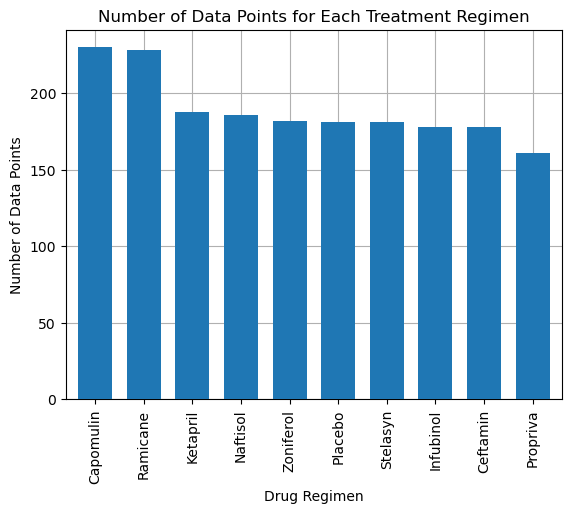

In [240]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
###timepoint = clean_df2.groupby(['Drug Regimen'])['Timepoint'].count() #do a groupby and count for each drug regimen
### plotted a bar chart using .plot.bar() and assorted the values so they are in descending. Chained in one line of code
###timepoint.sort_values(ascending=False).plot.bar()  
###plt.show()
bar_plot = mouse_data_complete['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
bar_plot.grid(zorder=0)


## Bar and Pie Charts

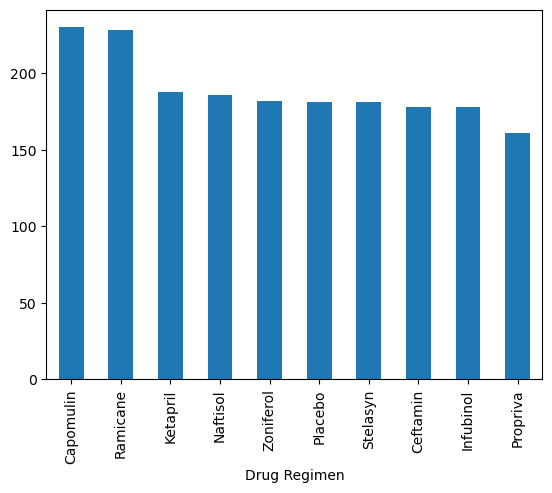

In [225]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
timepoint =mouse_data_complete.groupby(['Drug Regimen'])['Timepoint'].count() #do a groupby and count for each drug regimen
# plotted a bar chart using .plot.bar() and assorted the values so they are in descending. Chained in one line of code
timepoint.sort_values(ascending=False).plot.bar()  
plt.show()

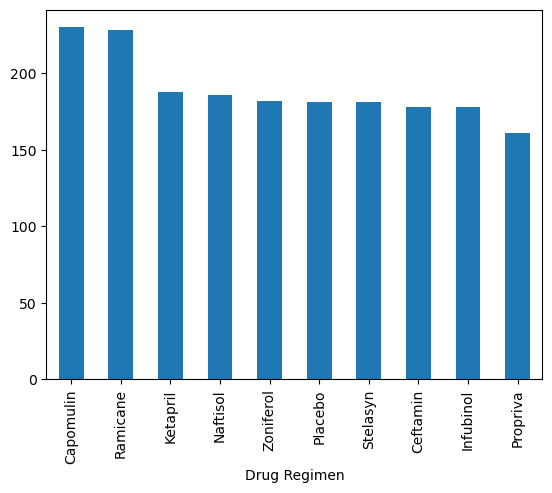

In [226]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_id_timepoint = mouse_data_complete.groupby(['Drug Regimen'])['Timepoint'].count() #do a groupby and count for each drug regimen
###  plotted a bar chart using .plot.bar() and assorted the values 
timepoint.sort_values(ascending=False).plot.bar()  
plt.show()

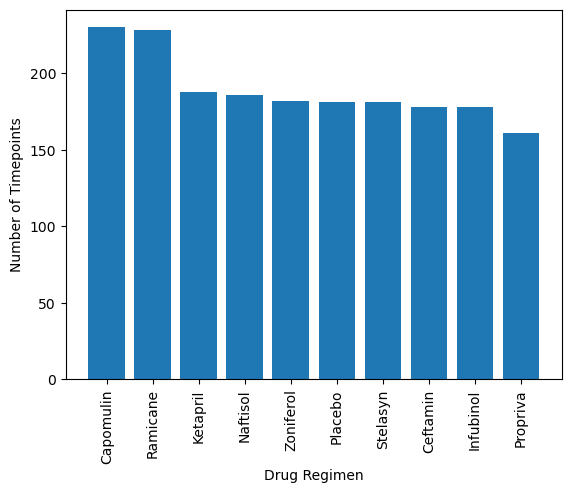

In [243]:
# Generate a bar plot showing the total number of mice for each treatment throughout the Timepoint
timepoint_desc = timepoint.sort_values(ascending=False) 
plt.bar(timepoint_desc.index, timepoint_desc.values) 
plt.ylabel('Number of Timepoints', size=10) 
plt.xlabel('Drug Regimen') 
plt.xticks(rotation='vertical') 
plt.show()

In [244]:
bygender = mouse_data_complete.groupby("Sex").count()
bygender 

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


<Axes: ylabel='Sex'>

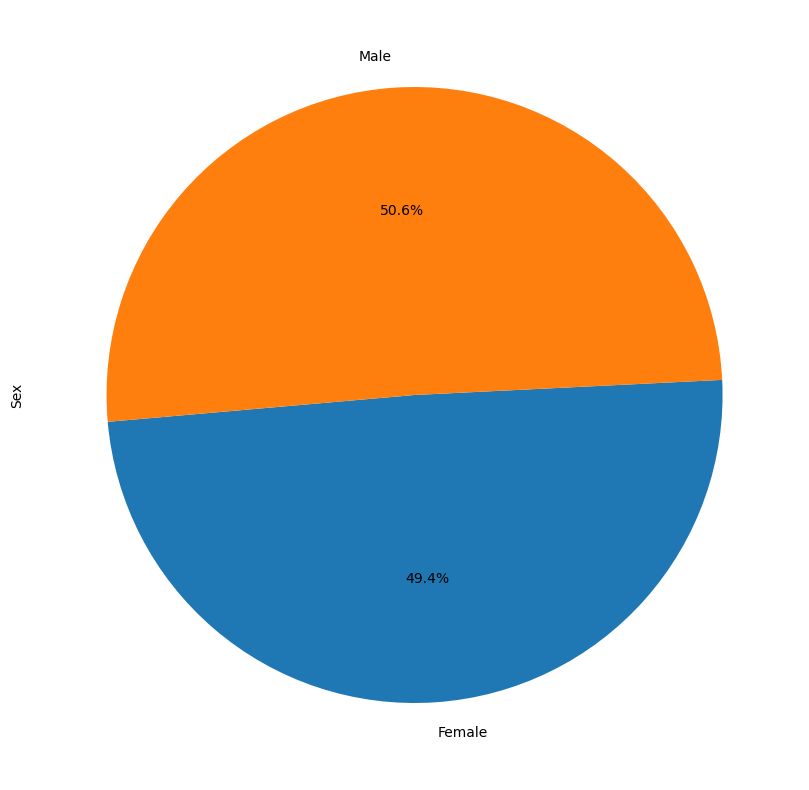

In [227]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = mouse_data_complete.groupby(['Sex'])['Sex'].count()
# plotted chart using pandas .plot.pie() with customizations
sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(10, 10))


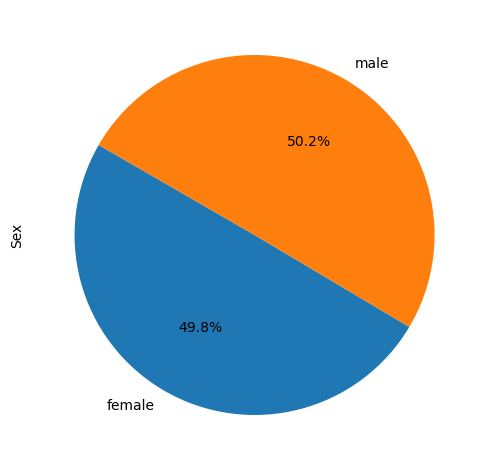

In [224]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('female', 'male'), startangle=150, autopct='%1.1f%%')
plt.ylabel('Sex') # labeled the pie chart
plt.tight_layout() # used to make it look better
plt.show()

## Quartiles, Outliers and Boxplots

In [228]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mice_tm = mouse_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
mice_tm_df = pd.DataFrame(mice_tm)
mice_df = pd.merge(clean_df2, mice_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
(sorted(mice_df))
mice_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,483,a262,Placebo,Female,17,29,45,70.717621,4
3,493,a275,Ceftamin,Female,20,28,45,62.999356,3
4,500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
244,1862,z435,Propriva,Female,12,26,10,48.710661,0
245,84,z578,Ramicane,Male,11,16,45,30.638696,0
246,1872,z581,Infubinol,Female,24,25,45,62.754451,3
247,1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = [] # Capomulin
tumor_ram = [] # Ramicane
tumor_inf = [] #  Infubinol
tumor_cef = [] # Ceftamin"

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
drug_df_min, drug_df_max, drug_df

(Capomulin    23.343598
 Ramicane     22.050126
 Infubinol    36.321346
 Ceftamin     45.000000
 dtype: float64,
 Capomulin    47.685963
 Ramicane     45.220869
 Infubinol    72.226731
 Ceftamin     68.923185
 dtype: float64,
     Capomulin   Ramicane  Infubinol   Ceftamin
 0   38.982878  38.407618  67.973419  62.999356
 1   38.939633  43.047543  65.525743  45.000000
 2   30.485985  38.810366  57.031862  56.057749
 3   37.074024  32.978522  66.083066  55.742829
 4   40.159220  38.342008  72.226731  48.722078
 5   47.685963  33.397653  36.321346  47.784682
 6   37.311846  37.311236  60.969711  61.849023
 7   38.125164  40.659006  62.435404  68.923185
 8   38.753265  29.128472  60.918767  67.748662
 9   41.483008  33.562402  67.289621  57.918381
 10  38.846876  36.374510  66.196912  46.784535
 11  28.430964  31.560470  62.117279  59.851956
 12  33.329098  36.134852  47.010364  64.299830
 13  46.539206  22.050126  60.165180  59.741901
 14  32.377357  30.564625  55.629428  61.433892
 15  4

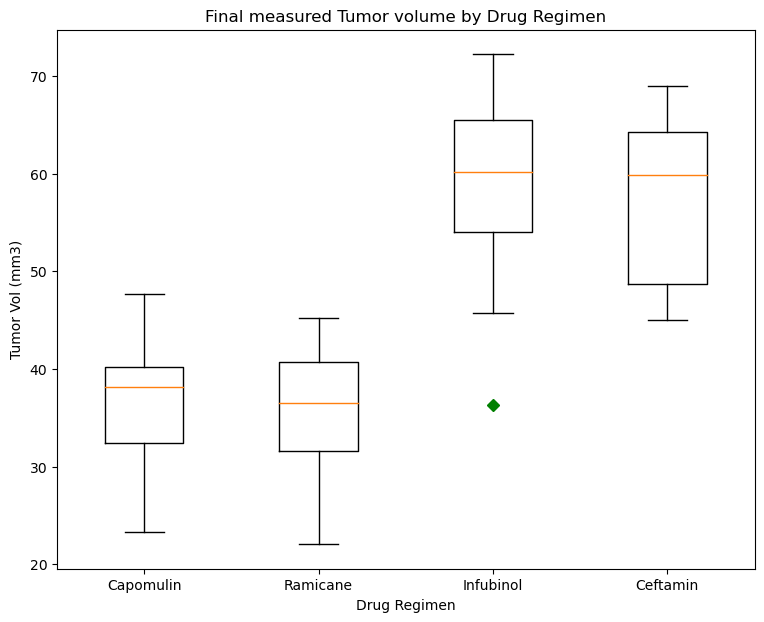

In [210]:
# Generate a box plot that shows the distrubution of the >>tumor volume for each treatment group.<<
# Resource https://www.machinelearningplus.com/plots/python-boxplot/ # Boxplot with Pandas
# index  is at 0 for treatments[0]
# import matplotlib.pyplot as plt 
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]
# used plt.subplots to define size
m_df = pd.DataFrame(df_clean_id2)
fig1, ax = plt.subplots(figsize=(9,7))
#set title
ax.set_title('Final measured Tumor volume by Drug Regimen')
# set x label
ax.set_xlabel('Drug Regimen') 
#set y lable
ax.set_ylabel('Tumor Vol (mm3)') 
# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot
# plt.boxplot(DataFrame[boxplot list], boxprops=dict(color='red')
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments) # set labels of each boxplot
# plt.title('Simple Boxplot');
plt.savefig('boxplot')
plt.show()

In [229]:
# Generate a box plot that shows the distrubution of the >>tumor volume for each treatment group.<<
# Resource https://www.machinelearningplus.com/plots/python-boxplot/ # Boxplot with Pandas
# index  is at 0 for treatments[0]
# import matplotlib.pyplot as plt 
# used plt.subplots to define size plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100}
# need to generate a box plot of the final tumor volume of each mouse across four regimens of interest
Last_df = mouse_data_complete.groupby(['Drug Regimen', 'Mouse ID','Timepoint' ]).last()['Tumor Volume (mm3)']
New_df = Last_df.to_frame()
Pass_df = pd.DataFrame(New_df)

Pass_df

Tumor Volume (mm3)
Drug Regimen Mouse ID Timepoint                    
Capomulin    b128     0                   45.000000
                      5                   45.651331
                      10                  43.270852
                      15                  43.784893
                      20                  42.731552
...                                             ...
Zoniferol    w575     45                  68.401286
             x613     0                   45.000000
                      5                   46.097041
                      10                  46.818176
                      15                  48.077646

[1888 rows x 1 columns]

In [232]:
forline_df = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "x613",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1774,x613,Zoniferol,Female,2,29,0,45.000000,0
1775,x613,Zoniferol,Female,2,29,5,46.097041,0
1776,x613,Zoniferol,Female,2,29,10,46.818176,0
1777,x613,Zoniferol,Female,2,29,15,48.077646,0


## Line and Scatter Plots

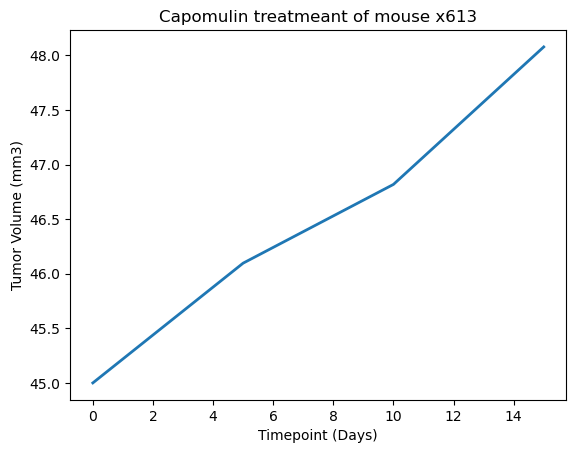

In [235]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse x613')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

C:\Users\Needra Pc\AppData\Local\Temp\ipykernel_24660\3211626004.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capavg = cap_df.groupby(['Mouse ID']).mean()


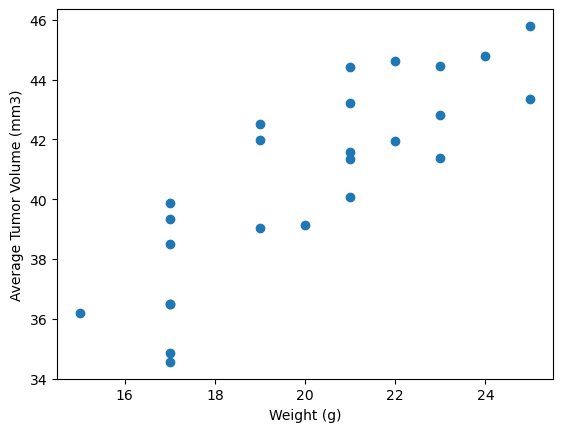

In [245]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

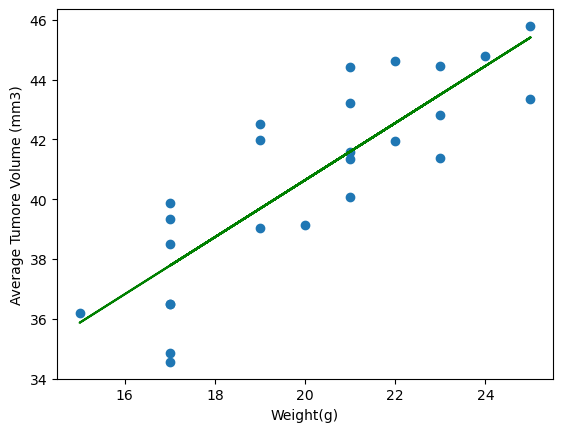

In [248]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="green")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()